# C++ Stable Marriage Assignment

## Task 1

In [1]:
// Import all packages we end up using
#include <unordered_map>
#include <iostream>
#include <vector>
#include <tuple>
#include <algorithm>
#include <string>

using namespace std; // Stops use having to put std:: before a lot of things (some reason bugs out when doing function definitions)


### Overview
The following implementation of the fundamental algorithm follows broadly along the lines of the one overviewed by Knuth. The loops in said algorithm description are implemented identically in the C++ algorithm. Some key additions to the pseudocode is the prologue step of setting up the preference tables to be compatible with the algorithm implementation. These steps are:

1. Creation of an list to store male suitors, allows for ease of access when required and for efficient access of these values. 

2. Addition of an undesirable male to female preference tables, alongside this each woman is temporarily engaged to this man.

3. Add undesirable man to male preference list. This needs to be done given how the loops are constructued to avoid reading from empty lists and causing an error. 

After initialisations, some key points of note within the loop that require explanation in comparison to the algorithm are:

1. The comparison between preference of partners is achieved by assigning respective numerical scores based on index positions in the vectors constructured to host preferences. 

2. The setting of `X` to the preceding fiance of `x` is done by first setting `X` to be the man most recently abandoned, then followed by generating a new preference list from the new suitor. 

In [2]:
/* 
* StableMarriageAlgo: Takes in two preference tables of unordered map with string:vector pairs. 
* Returns vector of tuples of matchings
*/
std::vector<tuple <string,string> > StableMarriageAlgo(unordered_map<string, vector<string> >  prefA, unordered_map<string, vector<string>>  prefB) 
{
    // Initialisation
    int k = 0;
    int n = prefA.size();

    /*  
    * Variables that are needing to be predefined
    */
    vector<string> :: iterator itr;  // This is a general variable used later on to recover index positions in vectors
    vector<string> prefs;
    vector<tuple <string, string> > tempMatchings; // Store temp matchings as the function output type
    string womCurrMatch;

    // Create an empty list to store male suitors
    vector<string> men;
    men.reserve(prefA.size()); 

    // Add undersirable man to the fold and temp engage to women
    for (auto& [key, v] : prefB) {
        v.push_back("undesirable");
        tempMatchings.push_back(tuple <string, string>("undesirable", key));
    }
    
    // Assign Male keys to a vector to allow easier iteration
    for(auto kv : prefA) {
        men.push_back(kv.first);
    } 
    // Add undesirable man to the male preference list to avoid some errors of empty vectors we get later
    prefA["undesirable"] = {};
    men.push_back("undesirable");
    
    while (k<n) {
        // Assign next man in list as the suitor
        string X = men[k];
            
        // Get that mans preference list
        prefs = prefA[X];
        
        // While the suitor isn't the undesirable man
        while (X != "undesirable") {
            // Find best remaining choice on suitors list
            string x = prefs[0];

            // Get index of suitor (X) and fiance from womans (x) list
            for (auto& [m,w] : tempMatchings) {
                if (w==x) {
                    womCurrMatch = m;
                }
            }
            
            // Find new mans index in womans list
            itr = find(prefB[x].begin(), prefB[x].end(), womCurrMatch);
            int womCurrMatchIndex = distance(prefB[x].begin(), itr);
            
            // Find index of suitor
            itr = find(prefB[x].begin(), prefB[x].end(), X);
            int womSuitorIdx = distance(prefB[x].begin(), itr);
            
            // Compare positions
            if (womSuitorIdx < womCurrMatchIndex) {
                // call off womans (x) current marriage and match suitor (X) and woman
                auto it = remove_if(tempMatchings.begin(), tempMatchings.end(), [&](auto & tup){ 
                    // Get the matching pairing to then be able to remove and replace from list
                    return (get<0>(tup) == womCurrMatch) && (get<1>(tup) == x); 
                }); 
                
                tempMatchings.erase(it, tempMatchings.end()); // resize the vector to only hold live elements
                tempMatchings.push_back(tuple <string, string>(X, x));
                
                // new suitor is abandoned man
                X = womCurrMatch;
                
                // Generate the new preference list
                prefs = prefA[X];
            }
            if (X != "undesirable") {
                // Remove x from suitors list
                prefs.erase(remove(prefs.begin(), prefs.end(), x), prefs.end());
            }
        }
        k+=1;
    }
    // Return sorted matchings
    sort(tempMatchings.begin(), tempMatchings.end());
    return tempMatchings;
}

In [3]:
/* 
    Create all data structures before carrying fundamental algorithm 
*/
vector<tuple <string, string> > matches; // Stores Matches tables
unordered_map<string, vector<string>> prefA, prefB; // Stores preference tables

// Populate Preference tables
prefA["A"] = {"c","b","d","a"};
prefA["B"] = {"b", "a", "c", "d"};
prefA["C"] = {"b","d","a","c"};
prefA["D"] = {"c", "a", "d", "b"};

prefB["a"] = {"A", "B", "D", "C"};
prefB["b"] = {"C", "A", "D", "B"};
prefB["c"] = {"C","B","D","A"};
prefB["d"] = {"B","A","C","D"};

(std::vector &) { "B", "A", "C", "D" }


In [4]:
// Test algorithm on above preference table
// We know from notes and python implementation what a stable matching entails here
matches = StableMarriageAlgo(prefA, prefB);

(std::vector &) { @0x7f1791e3b0c0, @0x7f1791e3b100, @0x7f1791e3b140, @0x7f1791e3b180 }


In [5]:
// Print matches: should be Ad, Ba, Cb, Dc
for (int i = 0; i<=matches.size()-1; i++) {
    cout << get<0>(matches[i]) << " marries " << get<1>(matches[i]) << endl;
}

A marries d
B marries a
C marries b
D marries c


In [6]:
// Test stable marriage on a larger preference table, 6x6.
// Tables randomlly generated using python code from previous assignment

vector<tuple <string, string> > matches_test_2; // Stores Matches tables
unordered_map<string, vector<string>> prefA_test_2, prefB_test_2; // Stores preference tables


prefA_test_2["A"] = {"d", "f", "c", "e", "a", "b"};
prefA_test_2["B"] = {"d", "b", "f", "a", "c", "e"};
prefA_test_2["C"] = {"d", "f", "c", "e", "b", "a"};
prefA_test_2["D"] = {"a", "b", "e", "f", "c", "d"};
prefA_test_2["E"] = {"a", "e", "f", "d", "c", "b"};
prefA_test_2["F"] = {"d", "c", "f", "e", "a", "b"};
prefB_test_2["a"] = {"B", "E", "F", "D", "A", "C"};
prefB_test_2["b"] = {"B", "C", "D", "A", "E", "F"};
prefB_test_2["c"] = {"C", "B", "F", "D", "A", "E"};
prefB_test_2["d"] = {"A", "F", "E", "B", "C", "D"};
prefB_test_2["e"] = {"A", "E", "C", "F", "D", "B"};
prefB_test_2["f"] = {"D", "B", "A", "E", "C", "F"};

matches_test_2 = StableMarriageAlgo(prefA_test_2, prefB_test_2);
// Print matches: should be Ad, Ba, Cb, Dc
for (int i = 0; i<=matches_test_2.size()-1; i++) {
    cout << get<0>(matches_test_2[i]) << " marries " << get<1>(matches_test_2[i]) << endl;
}

A marries d
B marries b
C marries f
D marries e
E marries a
F marries c


## Task 2

Computational complexity: From the outset looking at the number of loops used, a naive estimate
can be made. The `for` loop within two `while` loops indicate a complexity of at most $\mathcal{O}(n^3)$. However, the second `while` loop can run anywhere from constant ($\mathcal{O}(1)$) to linear ($\mathcal{O}(n)$) time. This leads to the complexity in this case to run between $\mathcal{O}(n^2)$ and $\mathcal{O}(n^3)$. However, it is likely on the former side as the theortical bound for this algorithm is $\mathcal{O}(n^2)$ and there does not seem to be any immediately glaring issues in code implementation that could contribute to a deviation from this.  

Assessing the data structures can give additional insight into complexity of other aspects. Key data structures and their complexity include:

1. `vector<string>`, variables attributed this data type are men and prefs. Albeit this type does exist within other types but will be dealt with later. With these variables, functions used on them are the access `[]` operator which runs in constant time, `erase` which runs linear, and `reserve` which runs linear at most. Alongside this a special iterator object which is assigned as a vector string, this is used to recover positions of elements in various other data structures. This main use is to use `find` which runs up to linear complexity, and `remove_if` which is linear. `push_back` is also used and is constant.


2. `vector <tuple <string, string> >`, variables using this are tempMatchings, and the return statement. Functions used are: `size()` and access `[]` which runs constant. 


3. `unordered_map`, this is used by prefA and PrefB, are `size()` and `[]` both running constant. Although there are  operators within `unordered_map` that run at logarithmic time, none of these have been used. 


4. Misc. Other built in std functions used not assigned to a specific data type include the `distance` function which is linear.

Overall the complexity is still running at nearer $\mathcal{O}(n^2)$.

Complexity calculations are taken from the [this c++](https://www.cplusplus.com/reference/) site.

## Task 3 
compiled output:

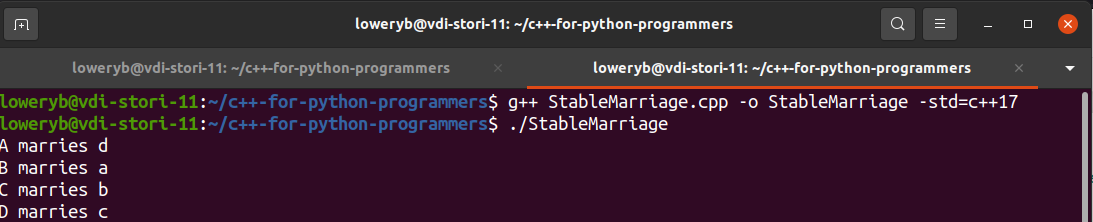